### 목표
- 손글씨(이미지)데이터를 활용한 다중분류 딥러닝 모델 구현

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential   # 뼈대역활(순차적으로 연산하는 딥러닝 모델 만들수 있음)
from tensorflow.keras.layers import InputLayer, Dense, Flatten
  #InputLayer 입력층을 결정하는 클래스(생략가능), Dense 퍼셉트론의 묶음, 
  # Flatten 평평하게 펴줌(2차원사진이 들어가도 1차원으로 처리가능)

In [4]:
# 현재 작업 폴더 확인
!pwd

/content


In [6]:
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [7]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [8]:
data = pd.read_csv("./data/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X.shape,y.shape

((42000, 784), (42000,))

In [10]:
X = X.values.reshape(-1,28,28)  # -1은 알아서 계산해주는 매직숫자~~(지금 저자리에는 사진갯수들어감)

In [11]:
X.shape,y.shape

((42000, 28, 28), (42000,))

### 정답 데이터를 원핫인코딩 하는 이유
- 신경망 출력층에서 각 클래스 값들에 대한 확률 정보와 비교하여 같은 스케일로 오차를 구해주기 위함!
- pd.get_dummies : 판다스에서 지원해주는 원핫인코딩 함수
- to_categorical : keras에서 지원해주는 원핫인코딩 함수


In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
# y를 원핫인코딩 시키기
y_one_hot = to_categorical(y)
y_one_hot

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### 모델링
1. 모델 구조 설계
2. 모델의 학습 및 평가 방법 설정
3. 모델 학습
4. 모델 평가

In [14]:
#1. 모델 설계
model = Sequential() #뼈대생성
model.add(InputLayer(input_shape=(28,28))) #입력층
model.add(Flatten()) #데이터를 1차원으로 변형(선형모델을 쓰려면 1차원이여야함)
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax')) # 출력층(10개가 나와야 하므로 다중분류)(출력층개수는 정답개수)

In [15]:
#2. 모델 학습 방법 및 평가방법 설정
model.compile(loss="categorical_crossentropy",
              optimizer="SGD",
              metrics=['accuracy'])

In [16]:
#3. 모델학습
h1 = model.fit(X,y_one_hot,epochs=50, validation_split=0.2)  

Epoch 1/50
1050/1050 [==============================] - 4s 3ms/step - loss: 2.2513 - accuracy: 0.2485 - val_loss: 2.1852 - val_accuracy: 0.3204
Epoch 2/50
1050/1050 [==============================] - 3s 2ms/step - loss: 2.0813 - accuracy: 0.5067 - val_loss: 1.9379 - val_accuracy: 0.6110
Epoch 3/50
1050/1050 [==============================] - 3s 3ms/step - loss: 1.7426 - accuracy: 0.6341 - val_loss: 1.5208 - val_accuracy: 0.6937
Epoch 4/50
1050/1050 [==============================] - 3s 2ms/step - loss: 1.3169 - accuracy: 0.7221 - val_loss: 1.1226 - val_accuracy: 0.7426
Epoch 5/50
1050/1050 [==============================] - 3s 3ms/step - loss: 0.9976 - accuracy: 0.7788 - val_loss: 0.8831 - val_accuracy: 0.7944
Epoch 6/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.8032 - accuracy: 0.8226 - val_loss: 0.7327 - val_accuracy: 0.8377
Epoch 7/50
1050/1050 [==============================] - 3s 2ms/step - loss: 0.6802 - accuracy: 0.8515 - val_loss: 0.6352 - val_accuracy:

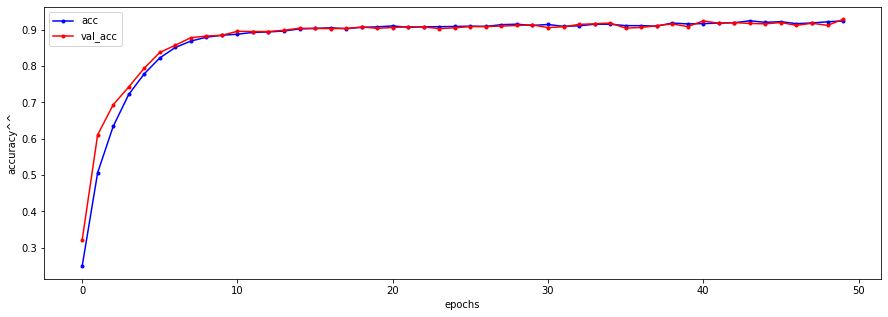

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.plot(h1.history['accuracy'], label='acc',c='blue', marker='.')

plt.plot(h1.history['val_accuracy'], label='val_acc',c='red', marker='.')

plt.xlabel("epochs")
plt.ylabel("accuracy^^")

plt.legend()
plt.show()